<a href="https://colab.research.google.com/github/kweng2bing/CS-310-data-structures-and-algorithms/blob/main/06_Scheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CPU Scheduling
---

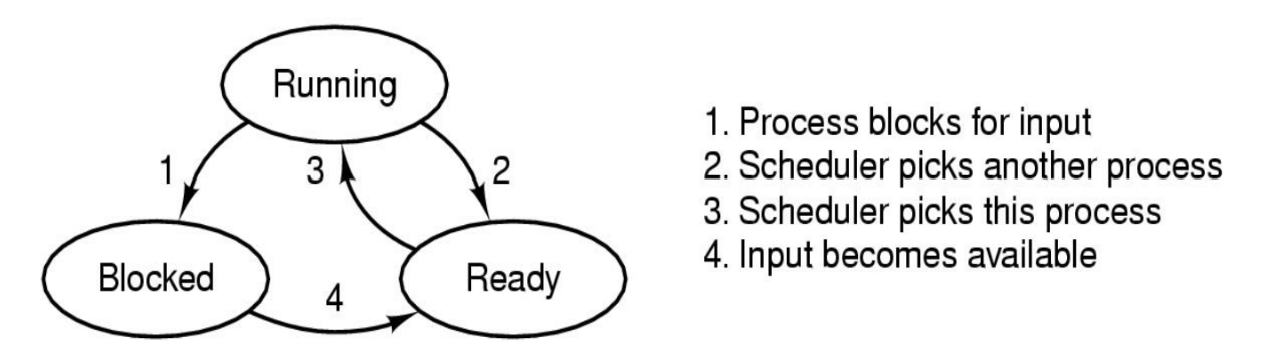

Notes:
* Ready
  * Process is ready to execute, but not yet executing
  * Waiting in the scheduling queue for the CPU scheduler to pick it up.
* Running
  * Process is executing on the CPU
* Blocked
  * Process is waiting (sleeping) for some event to occur.
  * Once the event occurs, process will be woken up, and placed on the scheduling queue.
* CPU scheduler makes the transitions between states.

##Process Lifecycle



Block for IO- read() , write()
* really slow process --> blocking

##CPU Scheduler
* Job of the CPU Scheduler is to select the next process --based on some scheduling polices -- to run on the CPU from the processes that are ready to execute
  *  CPU scheduler is a piece code of the kernel
  * The in-kernel “ready queue” data structure stores processes who are “ready”

##When
* CPU scheduling decisions mainly take place during process state transitions:
* Needs to be invoked somehow
 1. Running --> Block
    * Ex. Issue an I/O request
 2. Running --> Ready(Pre-emptive scheduling)
    * Ex. (Running too long), starving
    * Timer Interrupt
 3. Block --> Ready
    * I/O completes
 4. Terminates
    * exit()

##Scheduler & Dispatcher
* CPU Scheduler - select the next process
* Dispatcher - gives control of CPU to process selected by the scheduler
  * Context Switch

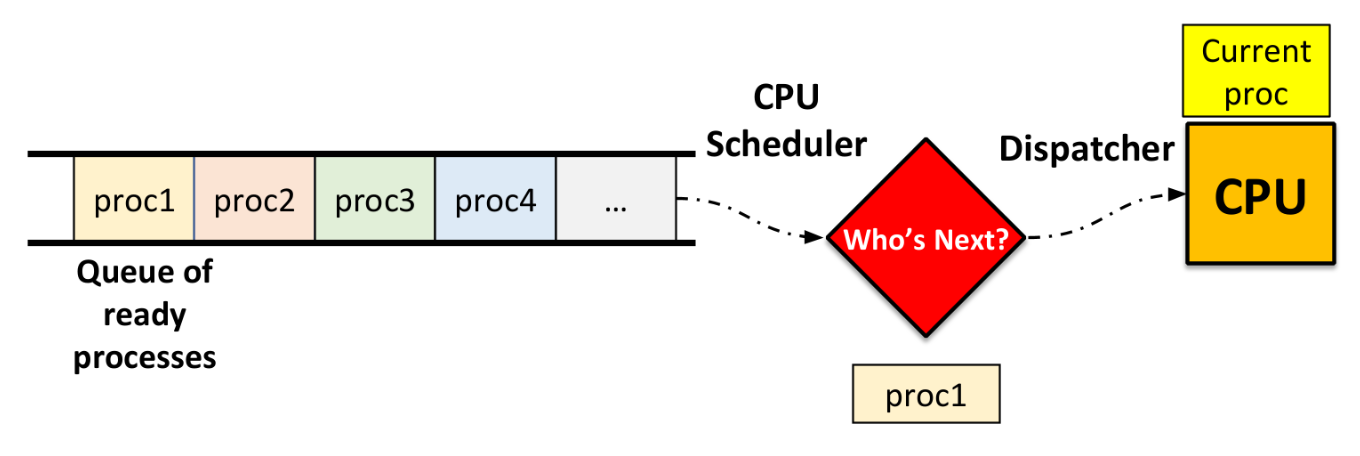

##Context Switch
* Context switch
  * Save CPU register values for the currently-executing process (eg. kernel stack) and restore the ones for the soon-to-be-executing process (e.g., from its kernel stack).
  * Once the CPU scheduler returns, the system will start executing the newly selected process
  * When the system transits from the user mode to the kernel mode (i.e., system calls), it also does context switch (between user code and kernel code within the same process)
* Take about 2-5 microseconds
  * Process is working with nanoseconds
* Secret special context switch registers
* Scheduler runs in infinite loop


##Scheduler Invoked
* Scheduler is a piece of kernel code, hence whenever kernel is invoked, there
is a chance for the scheduler to run
* Three ways to invoke kernel code
  * System calls
  * Hardware Interrupts (timer interrupts and device interrupts)
    * Timer interrupt is the most common way to invoke scheduler
  * Exceptions
  

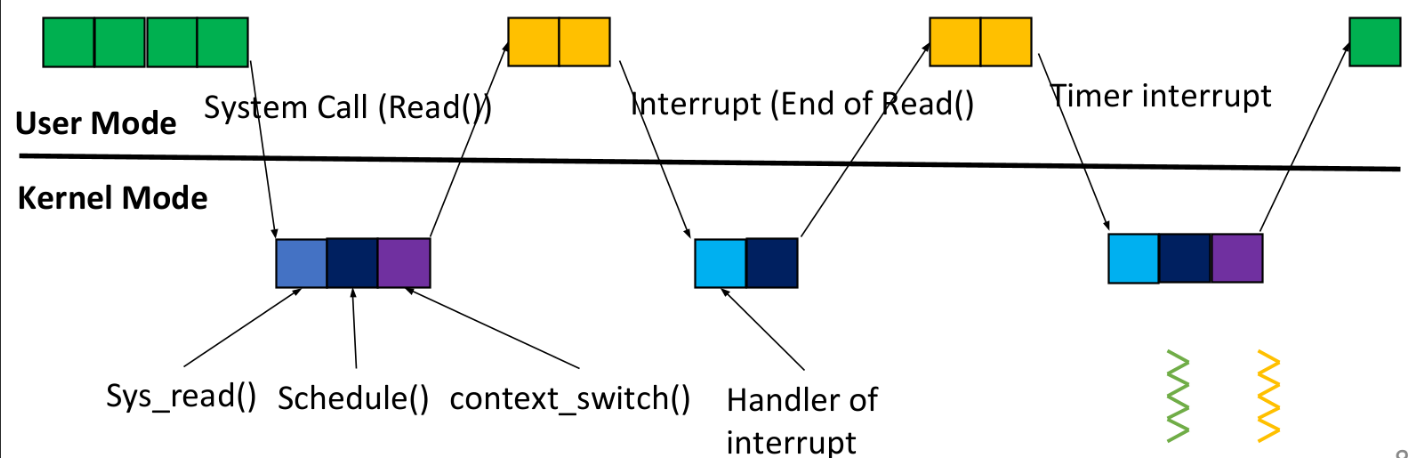

##Scheduling Criterion
* CPU utilization – keep the CPU as
busy as possible
  * Max CPU utilization(min nop/interrupts)
* Throughput – Number of processes that complete their execution per time unit
  * Max throughput
* Turnaround time – amount of time to execute a particular process, from submission to termination.
  * Min turnaround time
* Waiting time – amount of time a process has been waiting in the ready queue
  * Min waiting time
* Response time – amount of time it takes from when a request was submitted until the first response is produced.
  * Min response time

##Scheduling Goals
* All systems
 * Fairness – giving each process a fair share of the CPU
  * Policy enforcement – seeing that stated policy is carried out
  * Balance – keeping all parts of the system busy
* Batch systems
  * Throughput – maximize jobs per hour
  * Turnaround time – minimize time between submission and termination
  * CPU utilization – keep the CPU busy all the time
* Interactive systems
  * Response time – respond to requests quickly
  * Proportionality – meet users’ expectations
* Real-time systems
  * Meeting deadlines – avoid failing critical missions
  * Predictability – avoid quality degradation in multimedia systems

##Model Applications/Processes
* To design a CPU scheduler, we also need
to model applications/processes
* Without loss of generality, a process can be modeled in the way:
  * It consists of a sequence of CPU burst and I/O burst tasks
  * CPU tasks: consume CPU cycles
  * I/O tasks: block the process until I/O completions

#CPU Scheduling Algorithms
* First come, first served (FCFS)
* Shortest job first (SJF)
* Round Robin (RR)
* Real-time scheduling
* Priority Scheduling
* Multi-level feedback queue (MLFQ)

##First-Come, First-Served
```
Process     Burst Time    Arrival Time
P1            24            0
P2            3             1
P3            3             2

Gantt Chart
P1 Arrival
|    P2
|    |     P3
|    |     |
|    |     |
________________________________________________________
|P1                               |    P2   |  P3      |
0    1     2                     24        27        30
     |-----------P2----------------|
           |-----P3-------------------------|
```
Waiting Time (Time Started - arrival time)
* P1: $0-0= 0$
* P2: $24-1=23$
* P3: $(24+3)-2=25$
* Avg: (0+23+25)/3 = 16

Note:
* If P2 \rightarrow P1 \rightarrow P3
  * Shorter Waiting Time
* Convoy effect
  * Whole system slows down due to short processes behind long processes


##Shortest Job First
* SJF runs the shortest job first, then the next shortest, and so on.
* Consider & compare the length of its next CPU burst for each process.
* Schedule the process having the shortest next CPU burst.
* Two Schemes
  * Non-preemptive: Scheduler should wait until the completion of current process to select the next one
  * Preemptive: Scheduler can pick up a better candiate anytime and replaces the current process with the newer selection
* SJF gives a schedule with least average waiting time compared to
any possible scheduling algorithm.
  * Halting Problem: Cannot calculate burst time


```
Process     Burst Time    Arrival Time
P1            7             0
P2            4             2
P3            1             4
P4            4             5

Gantt Chart (SJF-Nonpreemptive)
P1 Arrival
|    P2
|    |     P3
|    |     |     P4
|    |     |     |
__________________________________________________________
|P1                    |  P3   |    P2     |           P4
0    2      4     5    7       8          12           16
     |-----------P2------------|
            |----P3---|
                  |-----------P4-----------|
```

Waiting Time (Time Started - arrival time)
* P1:  $0-0=0$
* P2:  $8-2=6$
* P3:  $(7)-4=3$
* P4:  $12-5=7$
* Avg: $(0+6+3+7)/4 = 4

###Preemptive
```
Process     Burst Time    Arrival Time
P1            7             0
P2            4             2
P3            1             4
P4            4             5

Gantt Chart (SJF-Preemptive)
P1 Arrival
|    P2
|    |     P3
|    |     |     P4
|    |     |     |
________________________________________________________
|P1  | P2  | P3  |  P2    |  P4   |    P1              |
0    2     4     5        7       11                   16
     |------------P1---------------|
<=================P1T==================================>    
            |-P2-|
     <===========P2=======>
            <=P3=>
                  |--P4---|
                  <=======P4========>
```

Waiting Time (Time in Queue/Not Running)
* P1:  9
* P2:  1
* P3:  0
* P4:  2
* Avg: $(9+1+0+2)/4 = 3
Turnaround Time (End- Arrival)
* P1:  $16-0=16$
* P2:  $7-2=5$
* P3:  $5-4=1$
* P4:  $11-5=6$
* Avg: $(16+5+1+6)/4 = 7






---

##Expontial Averaging(Predict CPU Burst)
* Not easy to get the length of next CPU burst. Can only guess.
* One approach: using the length of previous CPU bursts via exponential averaging
  * Predict future from history


$$\tau_{n+1} = \alpha t_{n} + (1-\alpha) * \tau_{n}$$
* $t_{n}$ = actual length of the nth CPU burst (history)
* $\tau_{n+1}$ = predicted value of the (n+1)th CPU burst
*  α, 0 <= α <= 1 (smoothing parameter)

Note:
* $(\alpha =0):=$ CPU burst histroy does not count
* $(\alpha =1):=$ Only last CPU burst histroy counts
$$\tau_{n+1} = \alpha t_{n} + (1-\alpha)\alpha t_{n+1} +...+(1-\alpha)^{n+1}t_{0}$$

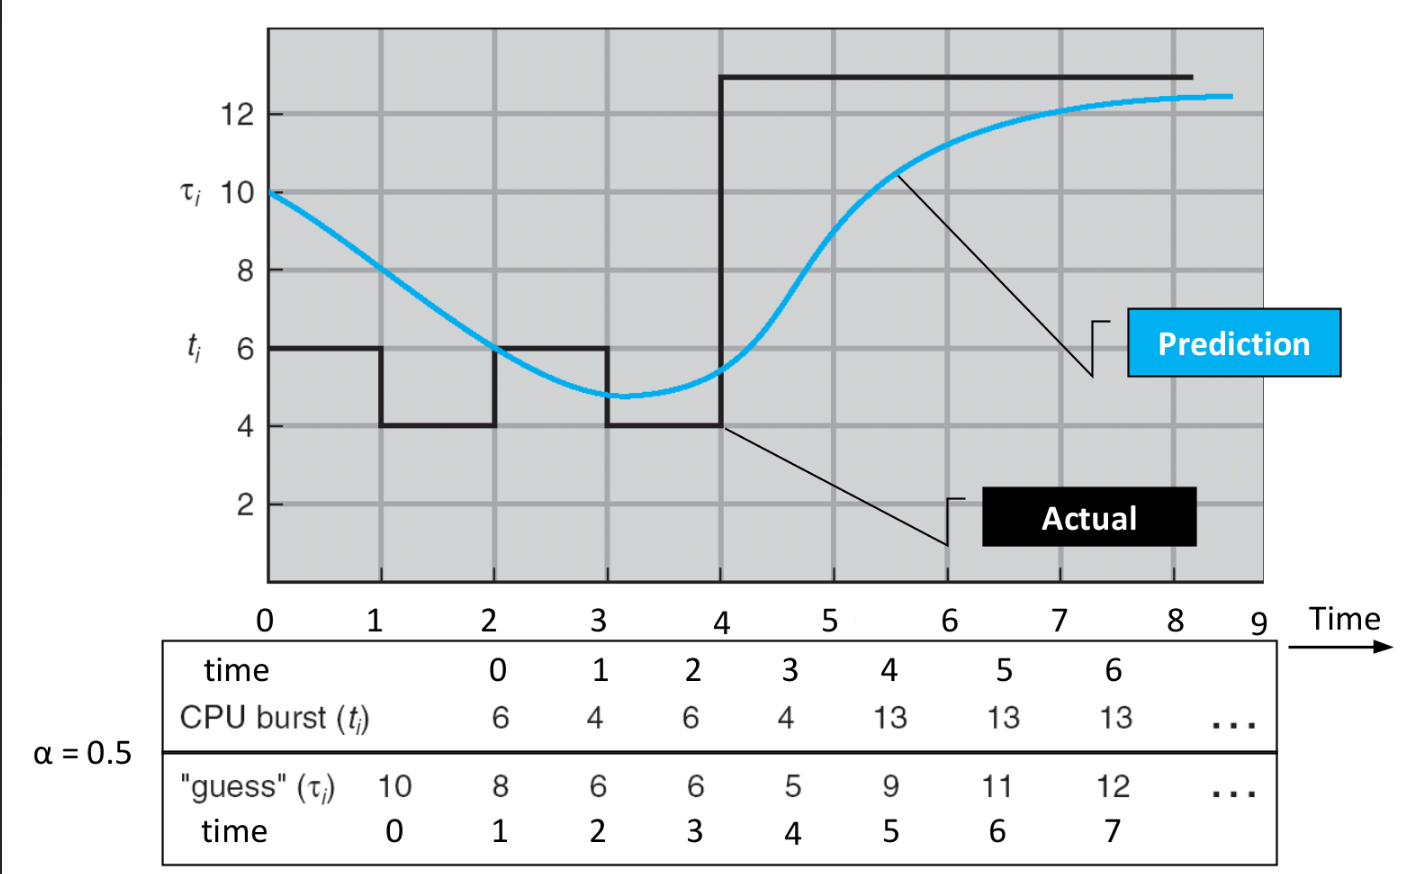

##Responsiveness
* SJF is optimal in terms of least average waiting time (or
turnaround time given the fixed CPU burst)
  * Desired goal for batch system
  * Not responsive; it may cause “starvation” – a long job may wait forever if short jobs keep coming
* Modern computer systems more care about interactive performance
  * How quickly the system responds to a new job
* Response time as the time from when the job arrives in a system to the first time it is executed (with a response)
  * T$_{\text{response}}$ = T$_{\text{firstrun}}$ - T$_{\text{arrival}}$

##Round Robin (RR)

* Each process gets a fixed unit of CPU burst time (time quantum)
  * usually, 10 to 100 milliseconds.
* After this time has elapsed, the process is preempted and added to the end of the ready queue.
* If there are n processes in the ready queue and the time quantum is $q$, then each process gets 1/n of the CPU time in
bursts of at most $q$ time units at once. No process waits more than $(n-1)q$ time units.

###Performance Discussion
* $q$ large == FCFS
* $q$ small
  * Smaller response time
  * Too much context switch (overhead too high)

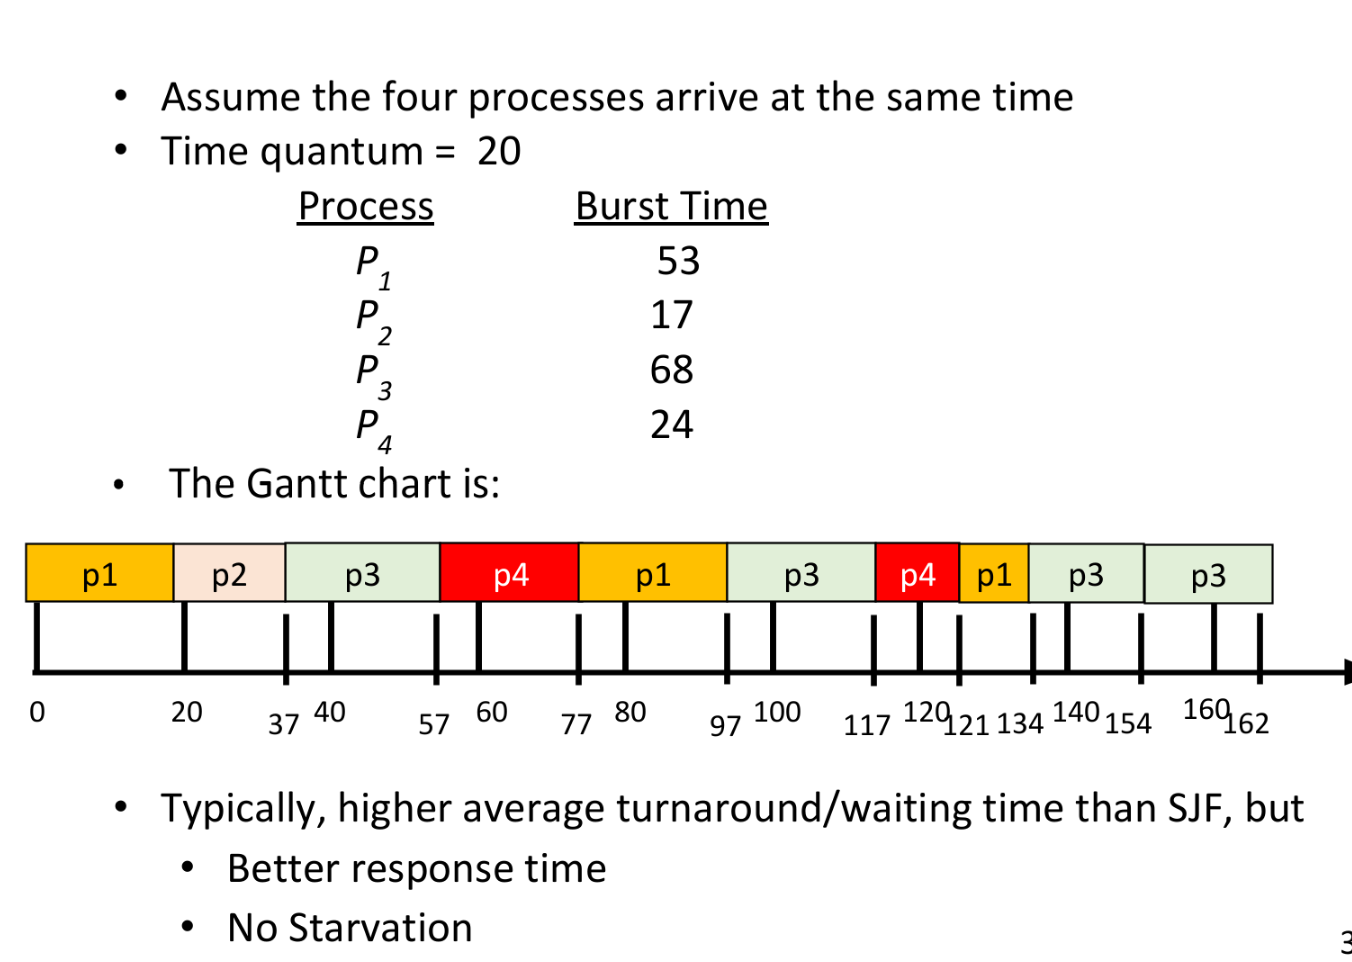

##Real-Time Scheduling

* Mission-critical tasks need to be completed before a given deadline
* Hard real-time systems
  * Required to complete a critical task before its deadline
    * Ex. a flight control system
* Soft real-time systems
  * Meeting deadlines desirable, but not essential
    * Ex. video or audio
* Schedulability criteria
  * Given $m$ periodic events, where event $i$ occurs within period $P_{i}$ and requires $C_{i} computation time each period
    * Then the load can be handled only if $sum_{i} (C_{i}/P_{i}) <= 1$

##Priority Scheduling
* We may run a mixed group of tasks with different importance levels
* A priority number (integer) is associated with each process
* Scheduling: the CPU is allocated to the process with the highest
priority (e.g., by convention smallest integer ≡ highest priority)
* Two types
  * Preemptive
  * Non-preemptive
* SJF is a priority scheduling algorithm where priority is the (predicted)
next CPU burst
* Problem: Starvation ➔ low priority processes may never execute
* Solution ≡ Aging ➔ as time progresses increase the priority of a lower priority process that is not receiving CPU time.

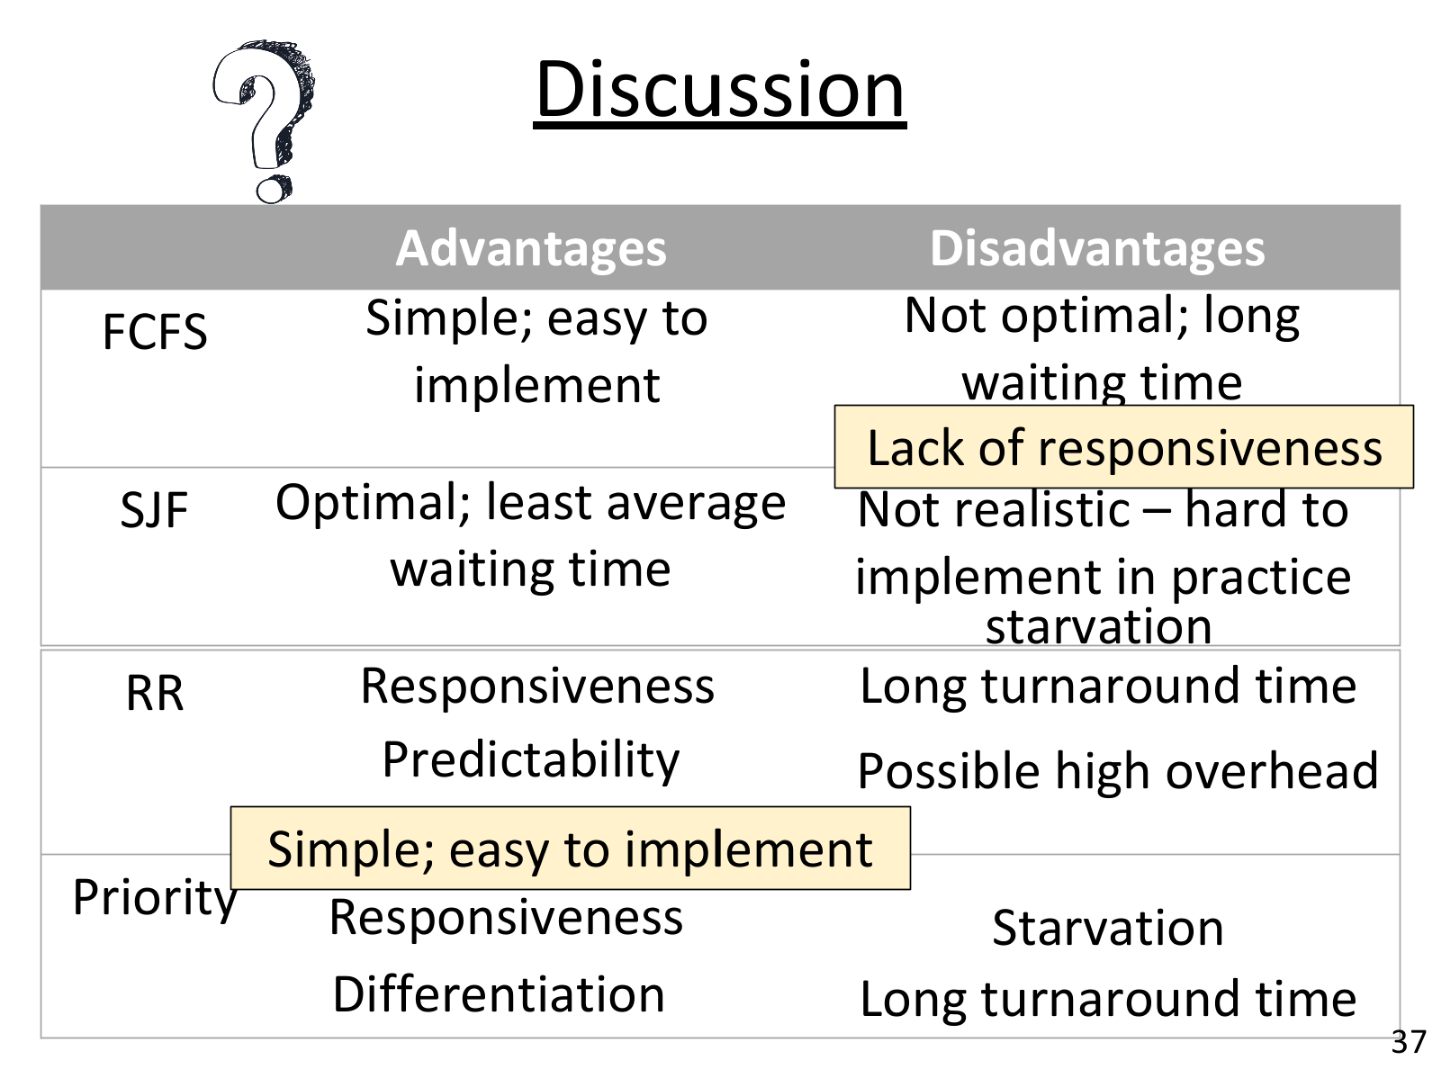

##Multi-Level Feedback Queue
* Developed Fernando Corbato → Turing Award
* Basic setup
  * The MLFQ has a number of distinct queues, each assigned a different priority level.
  * At any given time, a ready-to-run job is in a single queue.
  * MLFQ uses priorities to decide which job should run at a given time: a job in a queue with the highest priority is chosen to run.
  * For jobs in the same queue (same priority), RR is used.
* Key to MLFQ scheduling is to properly set priorities.
  * MLFQ *varies* the priority of a job based on its *observed behavior*
    * (Assumption: CPU-bound jobs should have lower priority than I/O-bound jobs)
  * For a job that uses the CPU intensively for long periods of time,
  what should MLFQ do with its priority?
    * Reduce its priority
  * For a job that repeatedly relinquishes CPU and waits for I/O, what should MLFQ do with its priority?
    * Keep its priority high
  * MLFQ uses history of a job to predict its future behavior
  * Priority changes over time. How?
    * Workload - a mix of interactive jobs that are short-running (and may frequently relinquish CPU), and some longer-running “CPU-bound” jobs that need a lot of CPU time but where response time isn't important

##Rules for MLFQ
1. Rule 1: If Priority(A) > Priority(B), A runs (B doesn’t)
2. Rule 2: If Priority(A) = Priority(B), A & B run in RR
3. Rule 3: When a job enters the system, it is placed at the highest
priority (the topmost queue)
4. Rule 4a: If a job uses up an entire time slice (i.e., time quantum) while
running, its priority is reduced (i.e., it moves down one queue)
4. Rule 4b: If a job gives up CPU before the time slice is up, it stays at the
same priority level

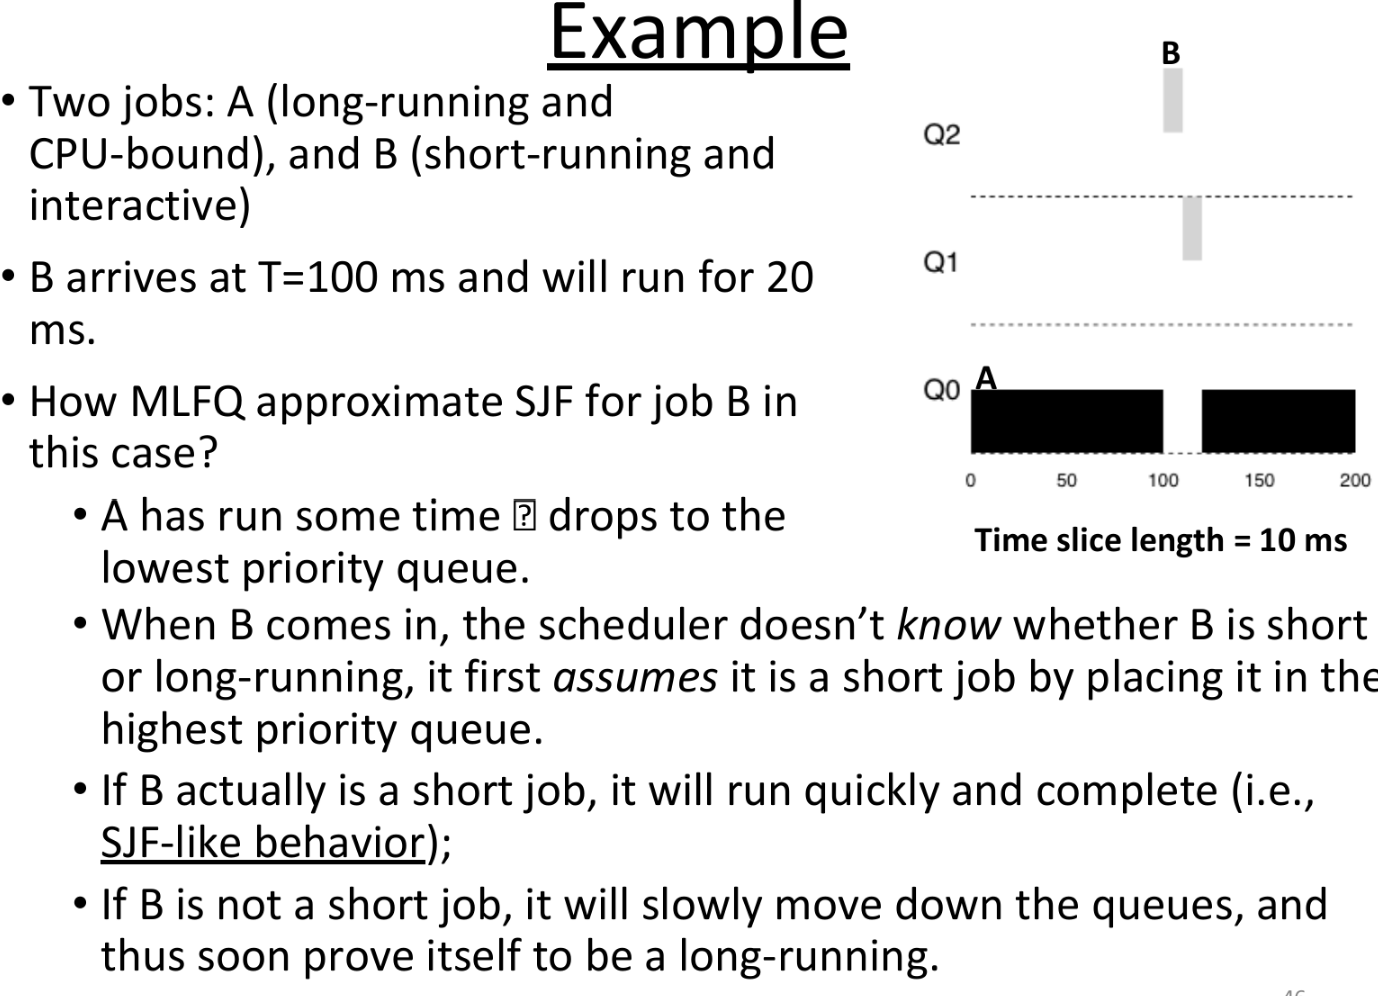

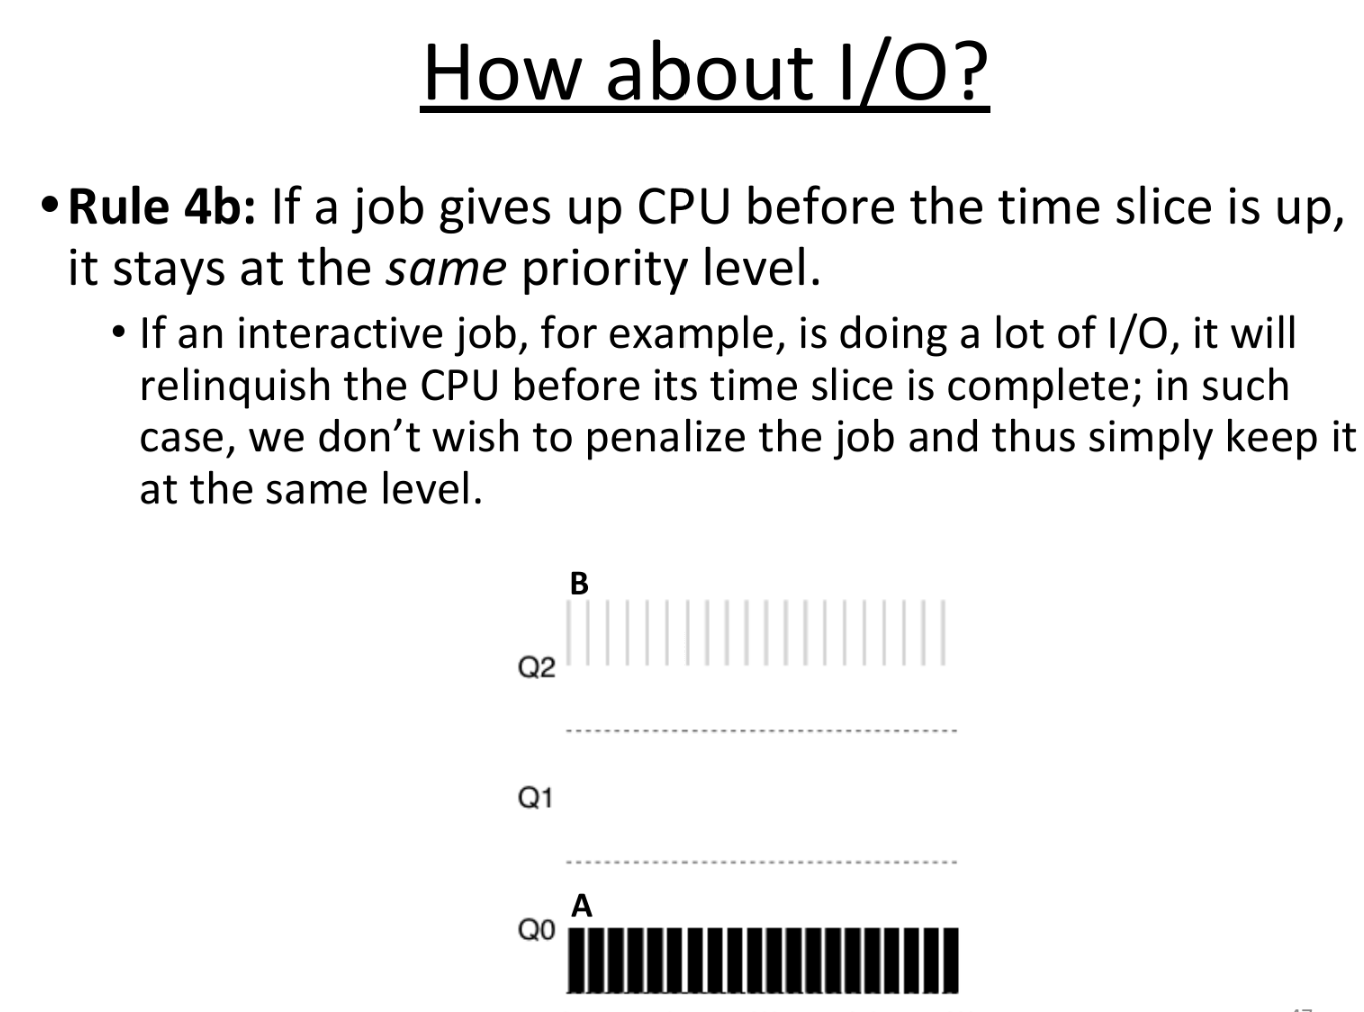

##Minor Problems
* Problems with the current version of MLFQ
  * Starvation: Too many interactive jobs, and thus long-running jobs will never receive any CPU time
  * Game the scheduler: Doing something sneaky to trick the scheduler into giving you more than your fair share of the resource.
  * What if a CPU-bound job turns to I/O-bound
    * There is no mechanism to move the job up to queues with higher priorities!

##Solutions
###Boosting priority
  * Rule 5: After some time period $S$, move all the jobs in the system to the topmost queue.
  * Resolves:
    * Starvation
    * When a CPU-bound job turns to I/O bound

###CPU time accounting
* The scheduler keeps track of how much time a job has executed; once the job has accumulatively used its time allotment (e.g., one time slice), it is demoted to the next priority queue.

Rule 4: If a ~job uses up an entire
time slice while running~, its
priority is reduced (i.e., it moves
down one queue); If a job gives
up CPU before the time slice is
up, it stays at the same priority
level.

→
Rule 4: Once a job **uses up its time allotment at a given level (regardless of how many times it has given up the CPU)**, its priority is reduced (i.e., it
moves down one queue).

##Tuning MLFQ
* How to parameterize MLFQ ?
  * How many queues?
  * How big should time slice be per queue?
  * How often should priority be boosted?
* No easy answers and need experience with workloads
  * Varying time-slice length across different queues (e.g., high-priority queues are usually given short time slices, and low-priority queues are with long time slices)
  * Some schedulers reserve the highest priority levels for operating system work.
  * Some systems also allow some user advice to help set priorities (e.g., for example, by using the command-line utility nice you can increase or decrease the priority of a job (somewhat) and thus increase or decrease its chances of running at any given time).

MLFQ summary

1. Rule 1: If Priority(A) > Priority(B), A runs (B doesn’t)
2. Rule 2: If Priority(A) = Priority(B), A & B run in RR
3. Rule 3: When a job enters the system, it is placed at the highest priority (the topmost queue)
  * Priority Range [-40,99]
  * User Process [60-99]
4. Rule 4: Once a job uses up its time allotment at a given level (regardless of how many times it has given up the CPU), its priority is reduced (i.e., it moves down one queue)
5. Rule 5: After some time period S, move all the jobs in the system to
the topmost queue
* Instead of demanding a priori knowledge of a job, MLFQ instead
observes the execution of a job and prioritizes it accordingly
* MLFQ manages to achieve the best of both worlds: it can deliver excellent overall performance (similar to SJF/STCF) for interactive short-running jobs, and is fair and makes progress for long-running CPU-intensive workloads

##MLFQ In Practice: Linux CFS
* Modern linux uses the “Completely Fair Scheduler” or CFS
* The CFS is a modern take on the MLFQ
  * CFS schedules “Tasks” – processes, threads, (and other things??)
  * Each CPU has its own run queue
* Each task in each run-queue tracks its own vruntime
  * vruntime ~= amount of time the task has spent on that CPU
  * weighted/modified by priority, niceness, I/O burst activity
* Each processes run queue is actually a red-black tree
* Nodes are organized by vruntime. CFS chooses the left-most node (lowest vruntime) to schedule
* vruntime creatively incorporates both priority and time accounting to make scheduling decisions

##Fair Scheduling
* Fairness !=  Equal CPU ∀ process
* Proportional share
  * N process; Each Process, $P_{i}$ is assigned a weight $w_{i}$
    * CPU Proces will be divided among process in proportion to their weight
    $CPU_{i} = \frac{w_{i}}{\sum\limits_{j=1}^{N} w_{j}} \times CPI$

##Fair-share scheduler
* Lottery scheduling: the scheduler holds a lottery to determine which process should get to run next.
  * Processes that should run more often should be given more chances to win the lottery.
* Foundational concept-tickets
  * Ex.
    * Two processes and a total 100 tickets in the system
    * Fair share of Process A 25%, Process B 75%
    * Process A has 25 tickets, process B has 75 tickets: assuming A: holds tickets 0 → 24, B: holds 25 →
    * While scheduling, the scheduler randomly generates a ticket between 0 and 99; whoever holds the ticket will take the CPU

Slide 10.

Max CPU utilization
* running nop, generate interrupt

Max throughput
completion - completing cpu burst; running instruction- cpu burst

ready --> running --> blocked

ie blocking to blocking

submission- blocked to ready

Slide 19.

Halting problem

Slide 24.
SJF
* No way to determine burst time/ find stf
* starvation- long running job heavily deep priortized

Slidde 27.
\alpha =0 --> FIFO

Slide 31.

q small
dispatch latency

Slide 36

Lower number = higher priority

ps -elf

PRI - explicity priority (-40 --> 99)
* 60-99
  * user proccess
* kernal at will